In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score,log_loss, matthews_corrcoef
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.utils import resample
from scipy import stats
%matplotlib inline

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import cross_validation, metrics
#from sklearn.grid_search import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras as keras
from sklearn.model_selection import StratifiedKFold
#from bayes_opt import BayesianOptimization
import contextlib
import gc
import contextlib

In [2]:
df=pd.read_csv("audios_dataset.csv")
dfOrig =pd.read_csv("audios_dataset.csv") #backup in case we need to access original df after transforming it
print(df.shape)


(86647, 41)


In [3]:
df.head(5)

,Unnamed: 0,sound.files,user,age,gender,language,dialect,fileType,rate,rateFormat,...,maxfun,meandom,mindom,maxdom,dfrange,modindx,startdom,enddom,dfslope,meanpeakf
0,1,audio1.wav,topherfangio,Adult,male,EN,AmericanEnglishn,wav,48000,16,...,5.333333,0.319481,0.03125,3.46875,3.43750,6.109091,0.56250,0.06250,0.0,0.110491
1,2,audio10.wav,topherfangio,Adult,male,EN,AmericanEnglishn,wav,48000,16,...,5.333333,0.889381,0.03125,6.78125,6.75000,5.509259,0.21875,1.65625,0.0,0.078869
2,3,audio100.wav,Peter,Adult,male,EN,CanadianEnglishn,wav,48000,16,...,5.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047247
3,4,audio1000.wav,anonymous,adult,male,EN,AmericanEnglishn,wav,48000,16,...,5.333333,0.334746,0.03125,0.56250,0.53125,8.882353,0.37500,0.40625,0.0,0.047247
4,5,audio10000.wav,LAVEENAZ,Adult,male,EN,AmericanEnglishn,wav,48000,16,...,5.333333,0.868608,0.03125,4.81250,4.78125,6.921569,0.62500,0.03125,0.0,0.047247


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86647 entries, 0 to 86646
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   86647 non-null  int64  
 1   sound.files  86647 non-null  object 
 2   user         86647 non-null  object 
 3   age          86647 non-null  object 
 4   gender       85093 non-null  object 
 5   language     82088 non-null  object 
 6   dialect      86647 non-null  object 
 7   fileType     86067 non-null  object 
 8   rate         86647 non-null  int64  
 9   rateFormat   85762 non-null  object 
 10  channels     85623 non-null  float64
 11  selec        86647 non-null  int64  
 12  duration     86647 non-null  float64
 13  meanfreq     86647 non-null  float64
 14  sd           86647 non-null  float64
 15  freq.median  86647 non-null  float64
 16  freq.Q25     86647 non-null  float64
 17  freq.Q75     86647 non-null  float64
 18  freq.IQR     86647 non-null  float64
 19  time

In [5]:
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Unnamed: 0,rate,channels,selec,duration,meanfreq,sd,freq.median,freq.Q25,freq.Q75,...,maxfun,meandom,mindom,maxdom,dfrange,modindx,startdom,enddom,dfslope,meanpeakf
count,86647.000000,86647.000000,85623.0,86647.0,86647.0,86647.000000,86647.000000,86647.000000,86647.000000,86647.000000,...,86605.000000,83925.000000,83925.000000,83925.000000,83925.000000,83925.000000,83925.000000,83925.000000,83925.0,86647.000000
mean,43324.000000,47990.091982,1.0,1.0,inf,1.674009,1.620234,1.073496,0.440994,2.515748,...,5.294748,0.767761,0.079705,4.351067,4.271361,7.859019,0.758649,0.959251,0.0,0.228541
std,25012.978724,545.884629,0.0,0.0,NaN,0.558131,0.339365,0.701247,0.266500,1.116180,...,0.331701,0.472826,0.111540,2.043963,2.060281,4.750440,1.152228,1.341905,0.0,0.309721
min,1.000000,16000.000000,1.0,1.0,inf,0.319316,0.462853,0.000141,0.000000,0.114264,...,0.089888,0.031250,0.031250,0.031250,0.000000,1.000000,0.031250,0.031250,0.0,0.047247
25%,21662.500000,48000.000000,1.0,1.0,NaN,1.262089,1.380044,0.611589,0.306388,1.620846,...,5.333333,0.447185,0.031250,2.687500,2.593750,4.831169,0.156250,0.156250,0.0,0.110491
50%,43324.000000,48000.000000,1.0,1.0,NaN,1.603174,1.621858,0.817837,0.399757,2.392275,...,5.333333,0.645120,0.062500,4.843750,4.781250,7.038278,0.343750,0.437500,0.0,0.142113
75%,64985.500000,48000.000000,1.0,1.0,NaN,1.992845,1.862929,1.355313,0.510079,3.275776,...,5.333333,0.989362,0.093750,6.062500,6.000000,9.936937,0.656250,1.031250,0.0,0.300223
max,86647.000000,48000.000000,1.0,1.0,inf,10.558163,6.607225,10.359553,5.006764,16.019965,...,16.000000,7.898234,7.000000,21.937500,21.843750,289.656126,11.062500,13.781250,0.0,6.529762


In [6]:
df.drop(['duration', 'sound.files', 'Unnamed: 0', 'user', 'rate'], axis=1, inplace=True)

In [7]:
# select the float columns
df_float = df.select_dtypes(include=['float64']).columns
# select non-numeric columns
df_int = df.select_dtypes(exclude=['int64']).columns

df_obj = df.select_dtypes(include=['object']).columns
# select non-numeric columns


In [8]:
df_float

Index(['channels', 'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75',
       'freq.IQR', 'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew',
       'kurt', 'sp.ent', 'time.ent', 'entropy', 'sfm', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx',
       'startdom', 'enddom', 'dfslope', 'meanpeakf'],
      dtype='object')

In [9]:
df_int

Index(['age', 'gender', 'language', 'dialect', 'fileType', 'rateFormat',
       'channels', 'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75',
       'freq.IQR', 'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew',
       'kurt', 'sp.ent', 'time.ent', 'entropy', 'sfm', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx',
       'startdom', 'enddom', 'dfslope', 'meanpeakf'],
      dtype='object')

In [10]:
df_obj

Index(['age', 'gender', 'language', 'dialect', 'fileType', 'rateFormat'], dtype='object')

In [11]:
# unique values in target ( gender) column
df['gender'].unique()

array(['male', 'female', nan], dtype=object)

In [12]:
df.shape

(86647, 36)

In [13]:
df['gender'].describe

<bound method NDFrame.describe of 0        male
1        male
2        male
3        male
4        male
         ... 
86642    male
86643    male
86644    male
86645    male
86646    male
Name: gender, Length: 86647, dtype: object>

In [14]:
df['gender'].describe()

,gender
count,85093
unique,2
top,male
freq,72161


In [15]:
#print("Total number of labels: " , df.query("gender").shape[0])
print("Number of males: ", df.query("gender == 'male'").shape[0])
print("Number of females: ", df.query("gender == 'female'").shape[0])
print("Target variable balance males: ", df.query("gender == 'male'").shape[0]/df.shape[0])
print("Target variable balance females: ", df.query("gender == 'female'").shape[0]/df.shape[0])
# df.query("A == 2 & B > 1 & C != 'z'").shape[0]

Number of males:  72161
Number of females:  12932
Target variable balance males:  0.832815908225328
Target variable balance females:  0.1492492527150392


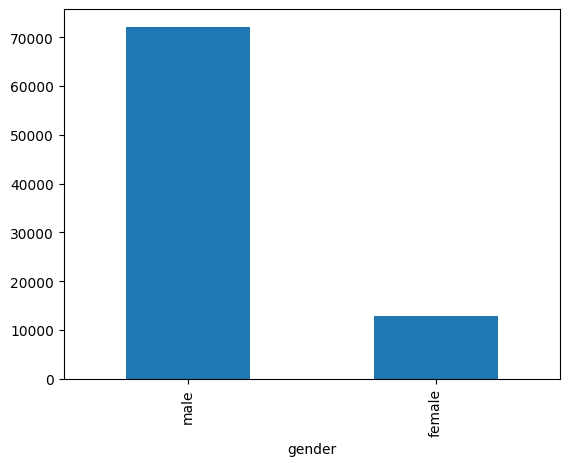

In [16]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

In [17]:
df['GenderEncoded']=df['gender'].replace(['male', 'female'],[0,1])

In [18]:
df['GenderEncoded']

,GenderEncoded
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86642,0.0
86643,0.0
86644,0.0
86645,0.0


In [19]:
df.head()

,age,gender,language,dialect,fileType,rateFormat,channels,selec,meanfreq,sd,...,meandom,mindom,maxdom,dfrange,modindx,startdom,enddom,dfslope,meanpeakf,GenderEncoded
0,Adult,male,EN,AmericanEnglishn,wav,16,1.0,1,1.624672,1.751428,...,0.319481,0.03125,3.46875,3.43750,6.109091,0.56250,0.06250,0.0,0.110491,0.0
1,Adult,male,EN,AmericanEnglishn,wav,16,1.0,1,1.879392,1.847794,...,0.889381,0.03125,6.78125,6.75000,5.509259,0.21875,1.65625,0.0,0.078869,0.0
2,Adult,male,EN,CanadianEnglishn,wav,16,1.0,1,2.766250,1.862706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047247,0.0
3,adult,male,EN,AmericanEnglishn,wav,16,1.0,1,0.981539,1.490405,...,0.334746,0.03125,0.56250,0.53125,8.882353,0.37500,0.40625,0.0,0.047247,0.0
4,Adult,male,EN,AmericanEnglishn,wav,16,1.0,1,2.298092,1.945568,...,0.868608,0.03125,4.81250,4.78125,6.921569,0.62500,0.03125,0.0,0.047247,0.0


In [20]:
nan_rows = df.isna().any(axis=1)
print(nan_rows)

0        False
1        False
2         True
3        False
4        False
         ...  
86642    False
86643    False
86644    False
86645    False
86646    False
Length: 86647, dtype: bool


In [21]:
fill_df = df.fillna(0)

In [22]:
df = df.fillna(0)

In [23]:
df.isnull().values.any()

False

<Axes: >

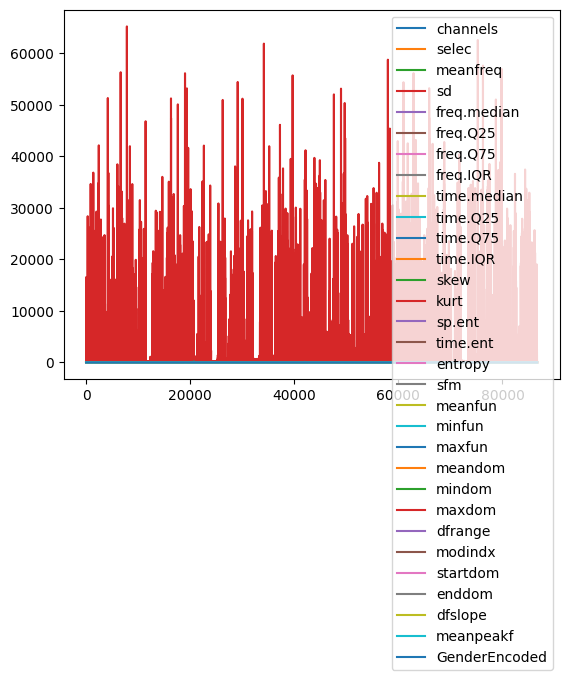

In [24]:
df.plot()

<Axes: >

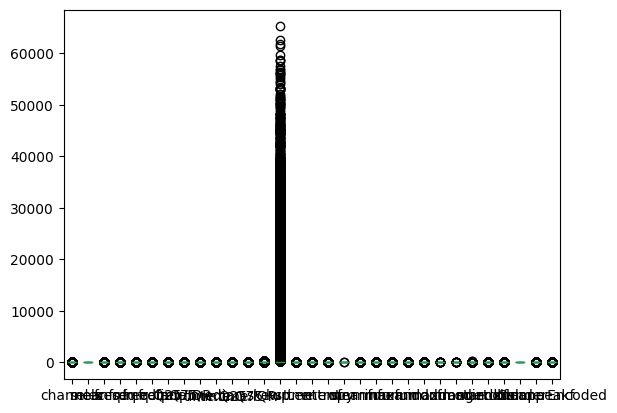

In [25]:
df.plot(kind = 'box')

In [26]:
cat= df.select_dtypes(include="object") #or include="category"
cont= df.select_dtypes(include=np.number)

In [27]:
cat

,age,gender,language,dialect,fileType,rateFormat
0,Adult,male,EN,AmericanEnglishn,wav,16
1,Adult,male,EN,AmericanEnglishn,wav,16
2,Adult,male,EN,CanadianEnglishn,wav,16
3,adult,male,EN,AmericanEnglishn,wav,16
4,Adult,male,EN,AmericanEnglishn,wav,16
...,...,...,...,...,...,...
86642,Adult,male,EN,EuropeanEnglishn,wav,16
86643,Adult,male,EN,EuropeanEnglishn,wav,16
86644,Adult,male,EN,EuropeanEnglishn,wav,16
86645,Adult,male,EN,EuropeanEnglishn,wav,16


In [28]:
cont

,channels,selec,meanfreq,sd,freq.median,freq.Q25,freq.Q75,freq.IQR,time.median,time.Q25,...,meandom,mindom,maxdom,dfrange,modindx,startdom,enddom,dfslope,meanpeakf,GenderEncoded
0,1.0,1,1.624672,1.751428,0.739515,0.348887,2.636305,2.287418,1.137006,0.600989,...,0.319481,0.03125,3.46875,3.43750,6.109091,0.56250,0.06250,0.0,0.110491,0.0
1,1.0,1,1.879392,1.847794,0.905645,0.453433,3.121416,2.667984,2.447598,1.932314,...,0.889381,0.03125,6.78125,6.75000,5.509259,0.21875,1.65625,0.0,0.078869,0.0
2,1.0,1,2.766250,1.862706,2.730423,1.104299,4.306481,3.202183,1.614583,1.001042,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0,0.047247,0.0
3,1.0,1,0.981539,1.490405,0.343132,0.191053,0.769935,0.578882,1.632629,1.083031,...,0.334746,0.03125,0.56250,0.53125,8.882353,0.37500,0.40625,0.0,0.047247,0.0
4,1.0,1,2.298092,1.945568,1.547153,0.494049,4.239883,3.745834,2.319850,1.788217,...,0.868608,0.03125,4.81250,4.78125,6.921569,0.62500,0.03125,0.0,0.047247,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86642,1.0,1,1.822460,1.941229,0.747662,0.362437,3.182656,2.820219,1.682353,1.116176,...,0.806452,0.06250,5.96875,5.90625,6.449735,0.09375,2.56250,0.0,0.142113,0.0
86643,1.0,1,1.439593,1.592634,0.685884,0.352187,2.032407,1.680220,2.514327,1.224928,...,0.533903,0.03125,5.40625,5.37500,11.116279,0.81250,0.56250,0.0,0.110491,0.0
86644,1.0,1,1.726927,1.781345,0.809552,0.352860,3.135566,2.782706,2.527055,1.416438,...,0.725806,0.03125,5.68750,5.65625,13.408840,0.21875,0.12500,0.0,0.110491,0.0
86645,1.0,1,1.505717,1.541638,0.750143,0.321658,2.270900,1.949242,1.648289,1.066540,...,0.544772,0.03125,4.59375,4.56250,4.767123,4.56250,0.31250,0.0,0.078869,0.0


In [29]:
cat.columns

Index(['age', 'gender', 'language', 'dialect', 'fileType', 'rateFormat'], dtype='object')

In [30]:
cont.columns

Index(['channels', 'selec', 'meanfreq', 'sd', 'freq.median', 'freq.Q25',
       'freq.Q75', 'freq.IQR', 'time.median', 'time.Q25', 'time.Q75',
       'time.IQR', 'skew', 'kurt', 'sp.ent', 'time.ent', 'entropy', 'sfm',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange',
       'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf',
       'GenderEncoded'],
      dtype='object')

<ipython-input-31-af0fedaac2ae>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x=feature, hue="gender", kind="kde")


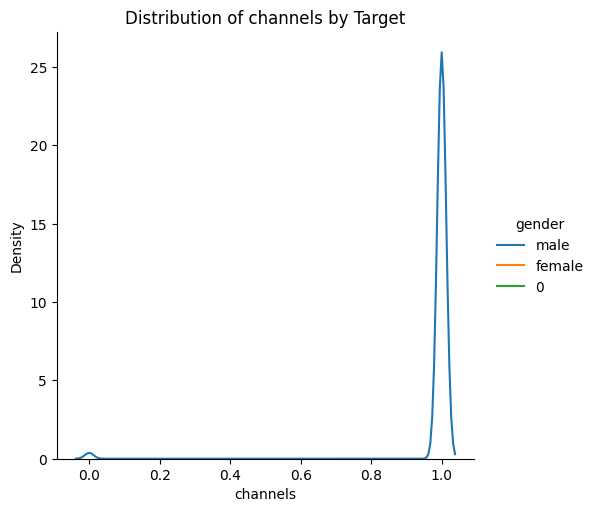

<ipython-input-31-af0fedaac2ae>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x=feature, hue="gender", kind="kde")


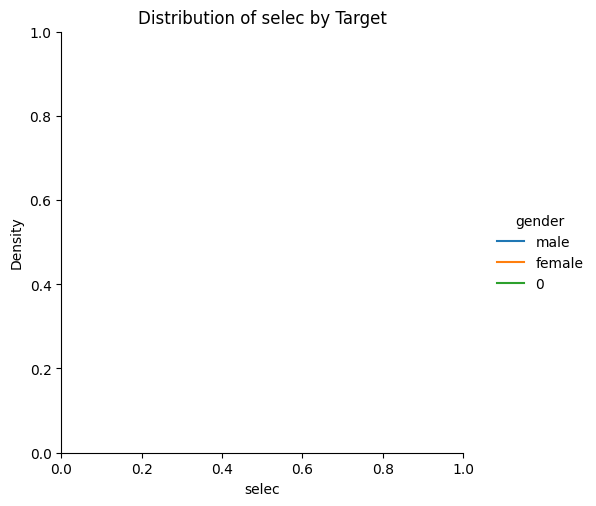

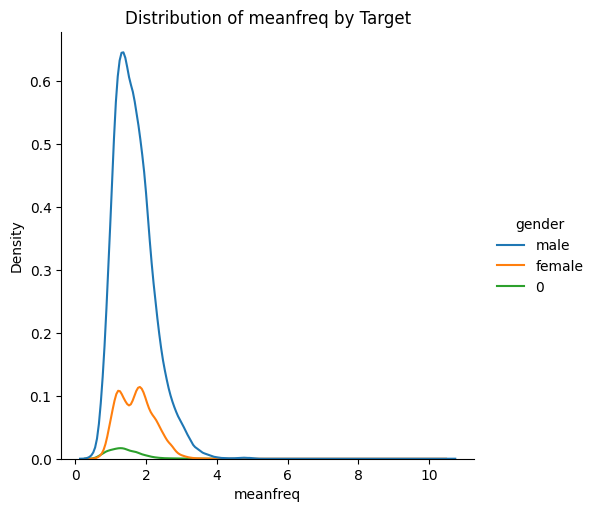

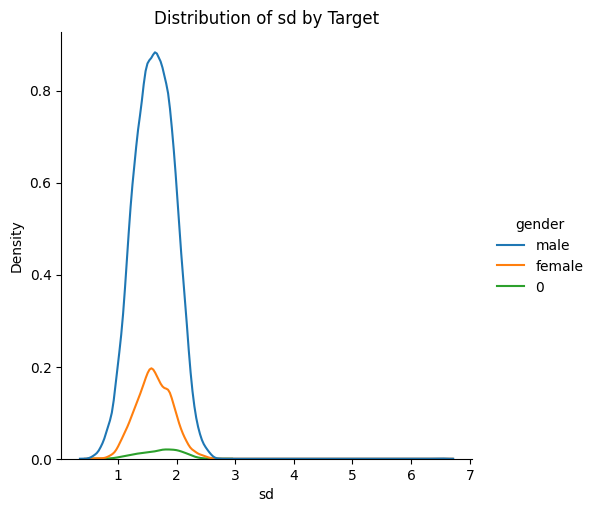

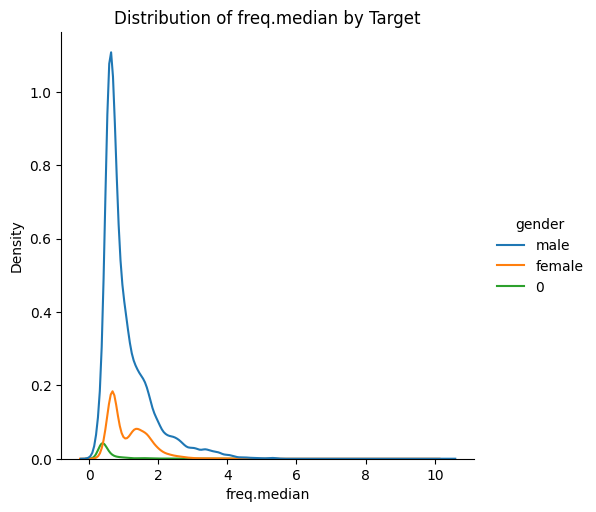

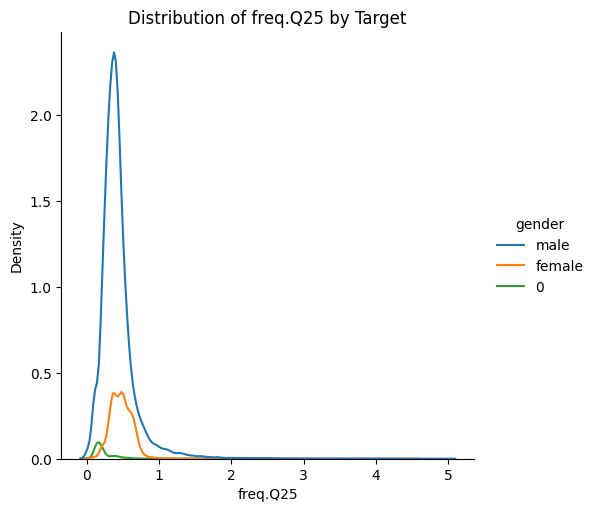

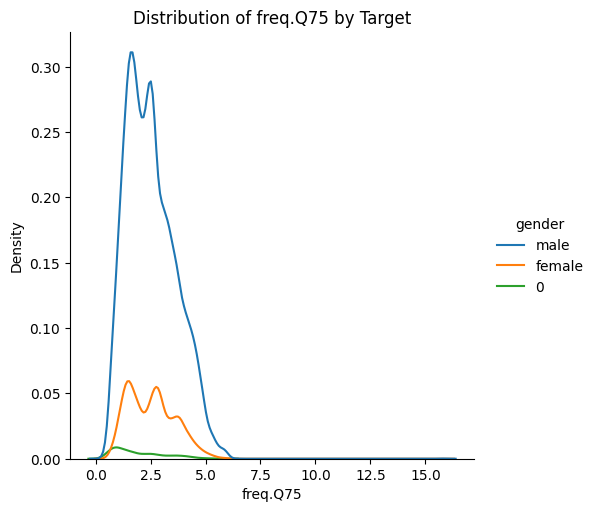

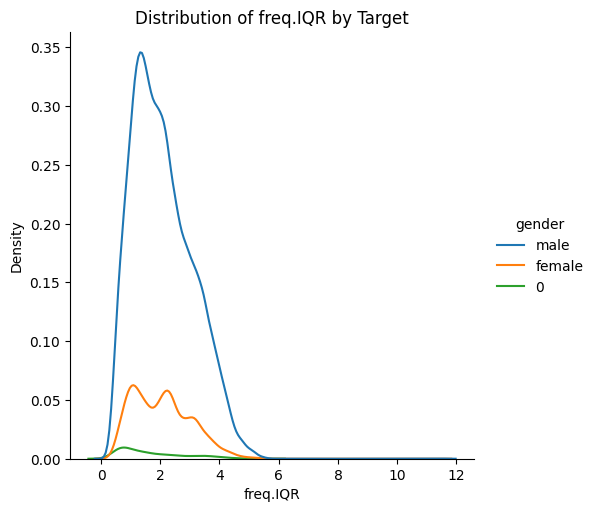

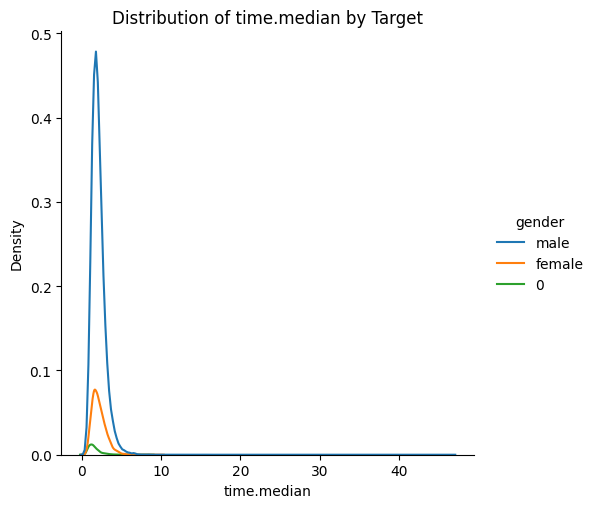

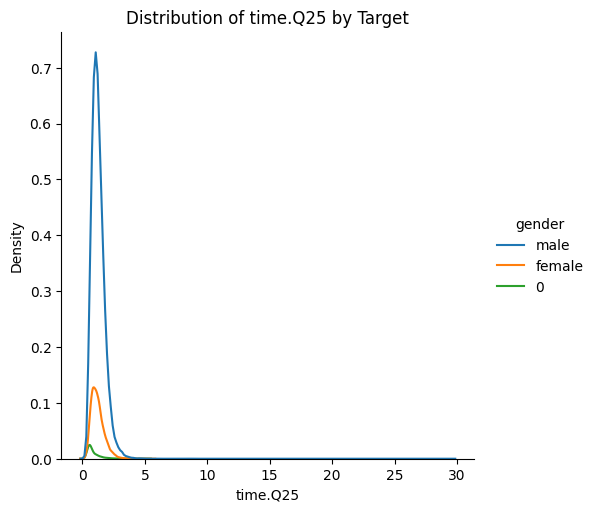

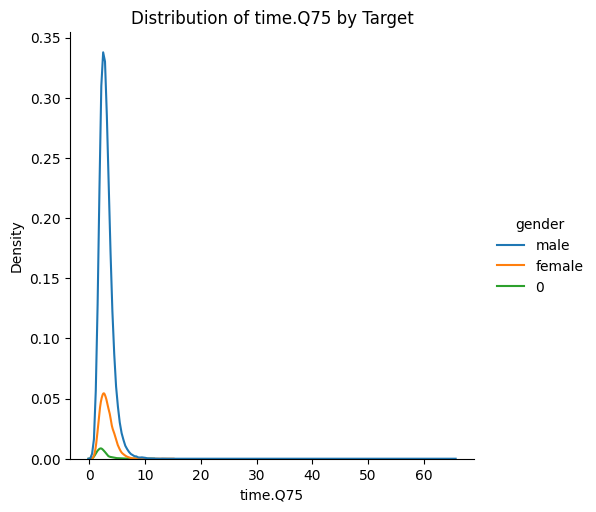

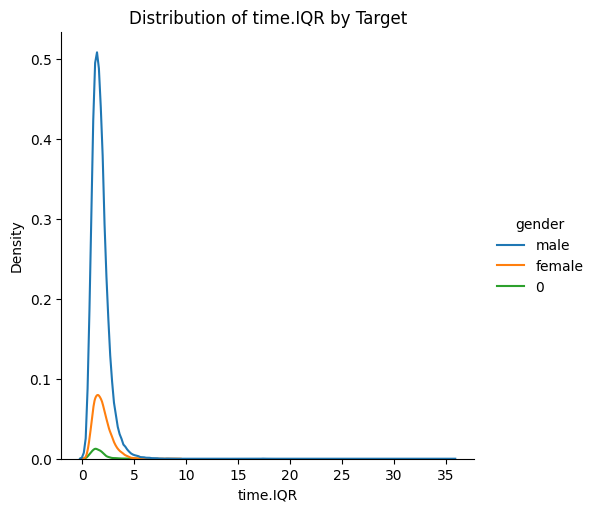

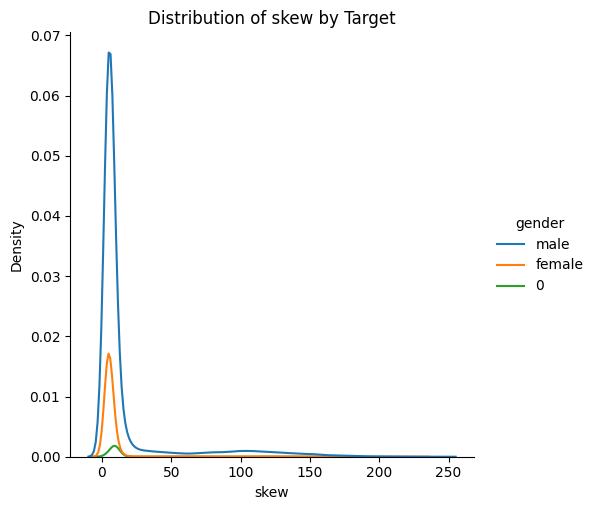

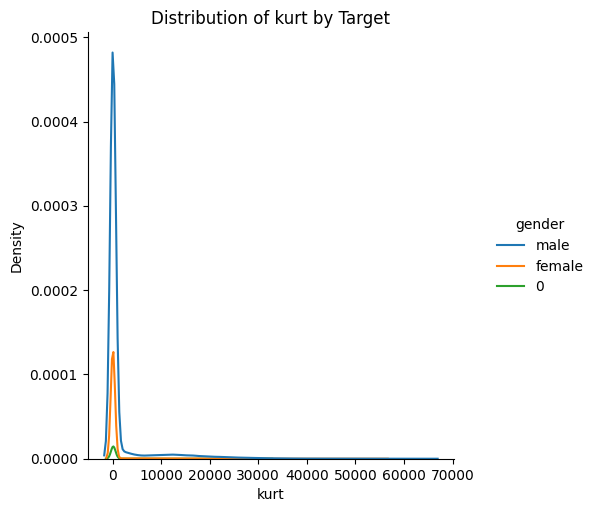

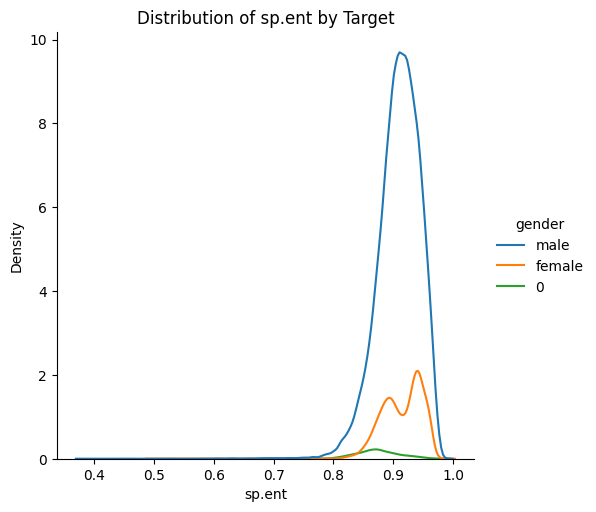

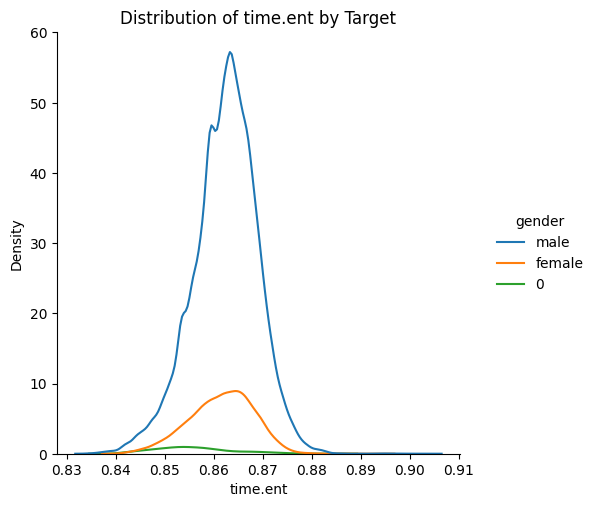

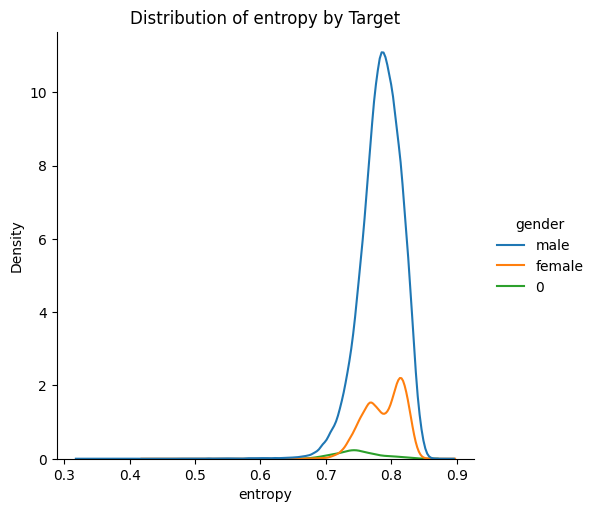

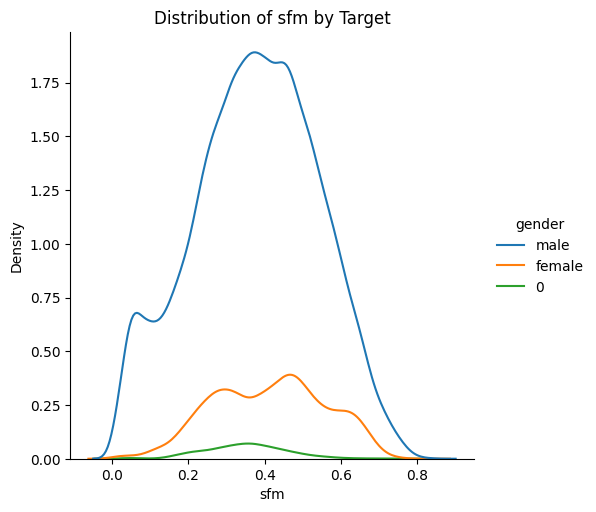

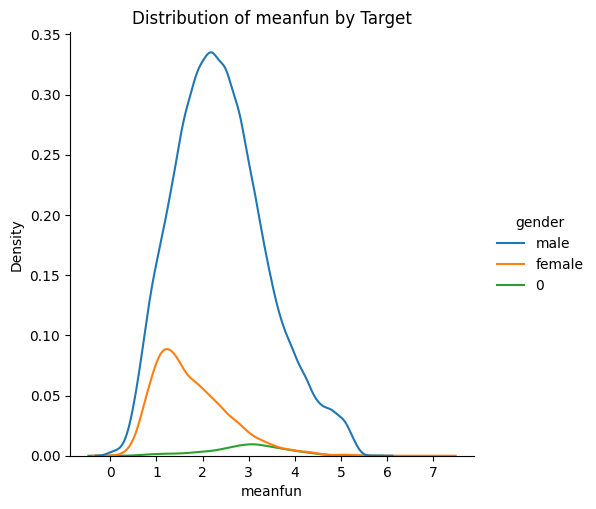

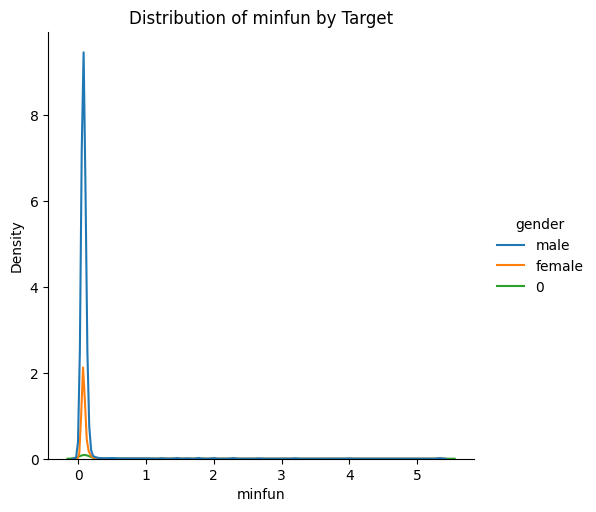

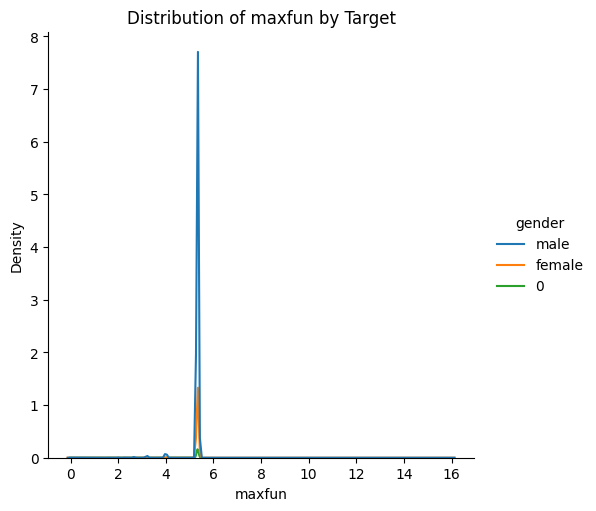

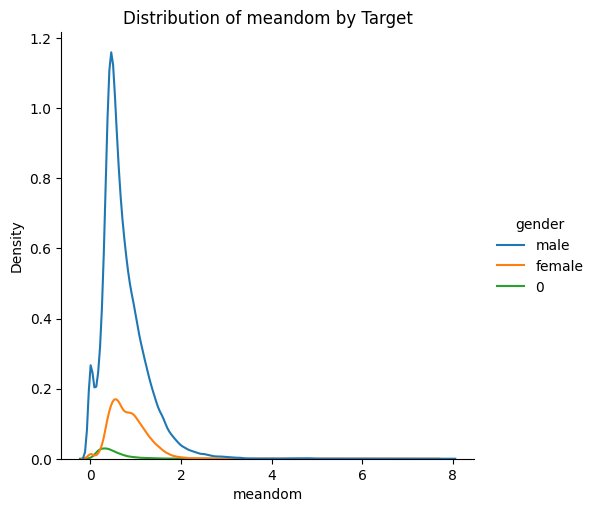

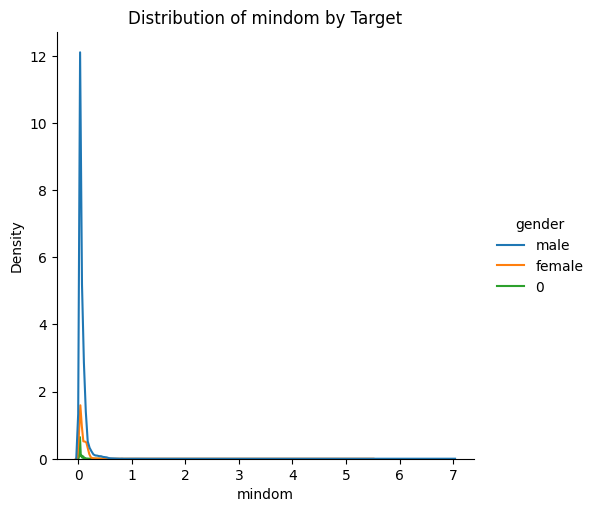

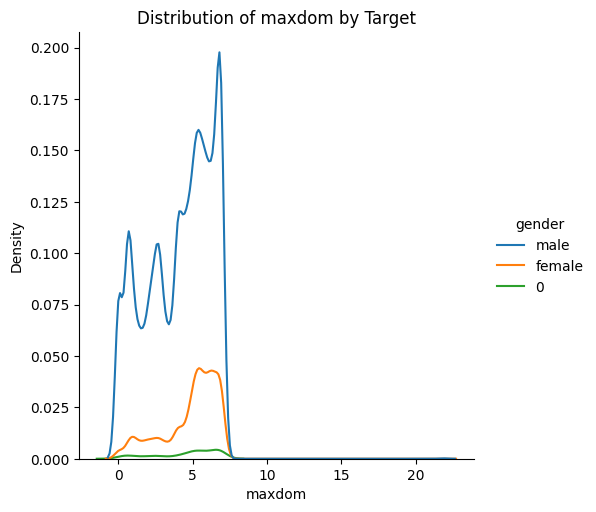

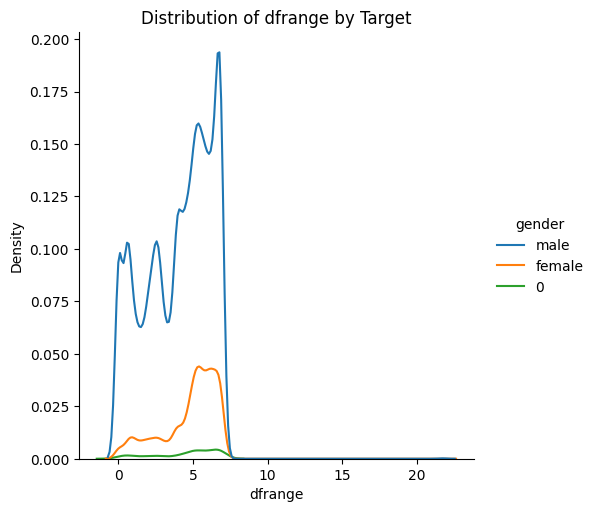

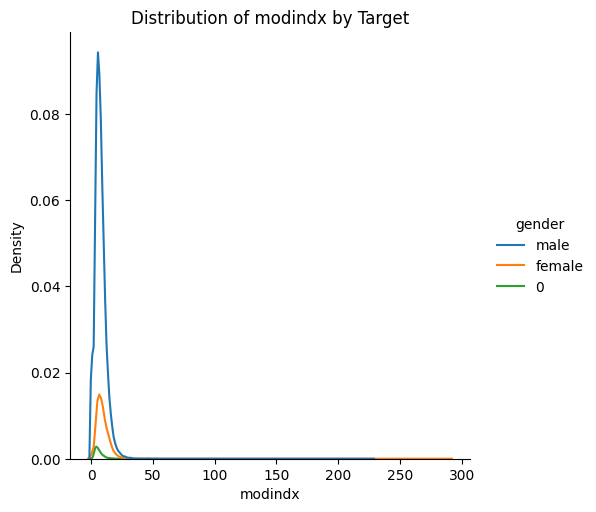

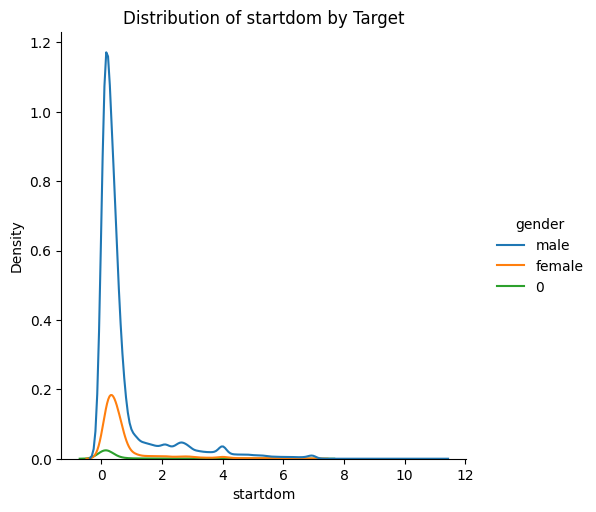

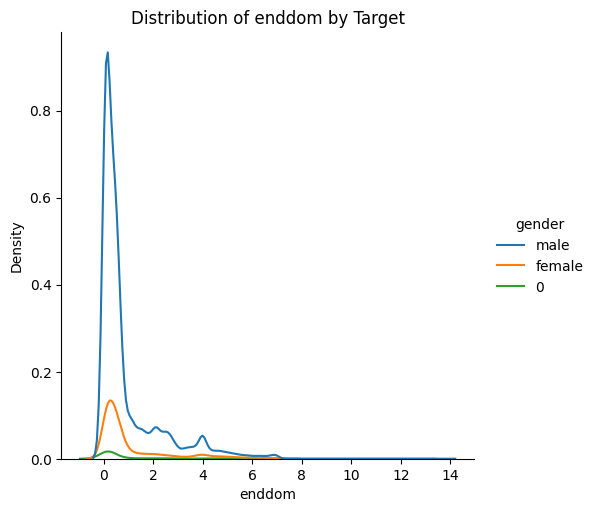

<ipython-input-31-af0fedaac2ae>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x=feature, hue="gender", kind="kde")


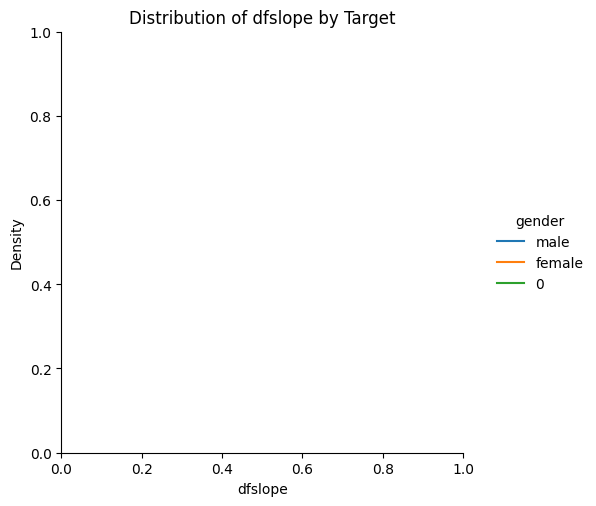

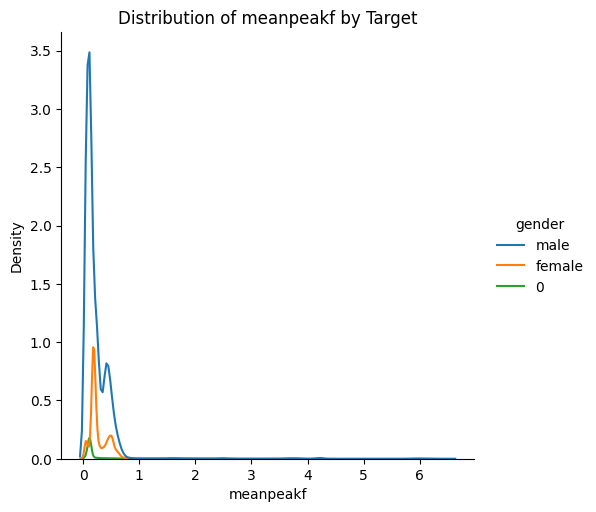

<ipython-input-31-af0fedaac2ae>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, x=feature, hue="gender", kind="kde")


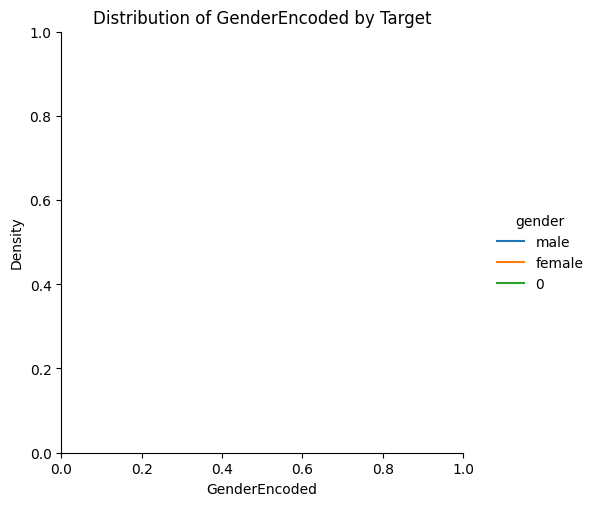

In [31]:
for feature in cont.columns:  # Loop through features

        sns.displot(data=df, x=feature, hue="gender", kind="kde")

        plt.title(f"Distribution of {feature} by Target")

        plt.show()

In [32]:
dfTmp = df.copy()
dfTmp.head()

,age,gender,language,dialect,fileType,rateFormat,channels,selec,meanfreq,sd,...,meandom,mindom,maxdom,dfrange,modindx,startdom,enddom,dfslope,meanpeakf,GenderEncoded
0,Adult,male,EN,AmericanEnglishn,wav,16,1.0,1,1.624672,1.751428,...,0.319481,0.03125,3.46875,3.43750,6.109091,0.56250,0.06250,0.0,0.110491,0.0
1,Adult,male,EN,AmericanEnglishn,wav,16,1.0,1,1.879392,1.847794,...,0.889381,0.03125,6.78125,6.75000,5.509259,0.21875,1.65625,0.0,0.078869,0.0
2,Adult,male,EN,CanadianEnglishn,wav,16,1.0,1,2.766250,1.862706,...,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0,0.047247,0.0
3,adult,male,EN,AmericanEnglishn,wav,16,1.0,1,0.981539,1.490405,...,0.334746,0.03125,0.56250,0.53125,8.882353,0.37500,0.40625,0.0,0.047247,0.0
4,Adult,male,EN,AmericanEnglishn,wav,16,1.0,1,2.298092,1.945568,...,0.868608,0.03125,4.81250,4.78125,6.921569,0.62500,0.03125,0.0,0.047247,0.0


In [33]:

for feature in cont.columns:
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
  #df[feature] = df[feature].astype(float)
#df[cat] = df[cat].astype(float)

<Axes: >

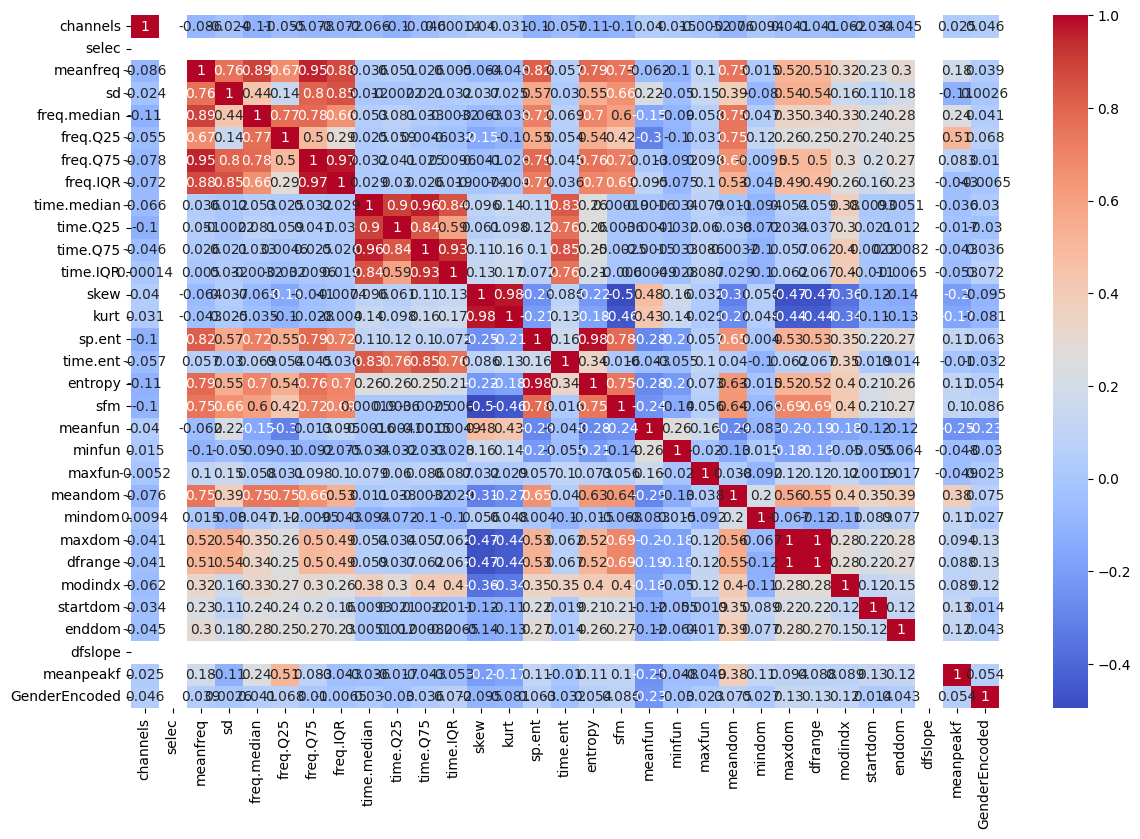

In [34]:
corr = cont.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

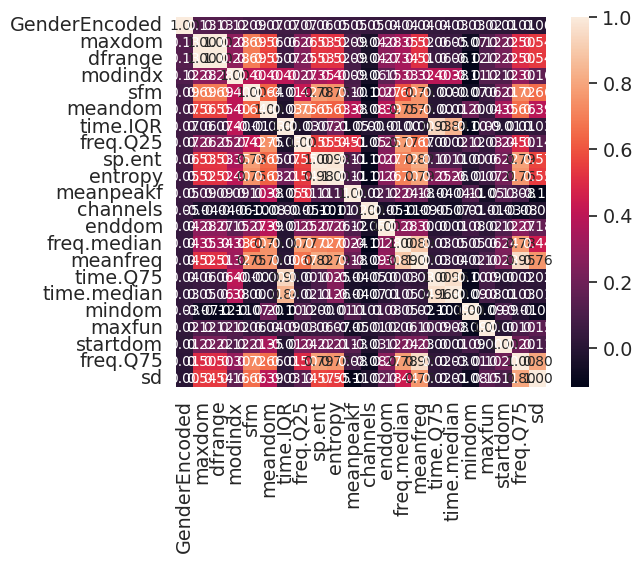

In [35]:
k = 22 #number of variables for heatmap
cols = corr.nlargest(k, 'GenderEncoded')['GenderEncoded'].index
cm = np.corrcoef(cont[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
corr = cont.corr()

In [37]:
cont.corr(method='pearson')['GenderEncoded'].sort_values(ascending=False,axis=0)

,GenderEncoded
GenderEncoded,1.000000
maxdom,0.130760
dfrange,0.128762
modindx,0.117222
sfm,0.085618
meandom,0.074646
time.IQR,0.072239
freq.Q25,0.068414
sp.ent,0.062982
entropy,0.054218


In [38]:
for feature in cont.columns:
  percent = (df[feature].isnull().sum()/df[feature].isnull().count())
  print("**: ", feature, " :: ",percent)

**:  channels  ::  0.0
**:  selec  ::  0.0
**:  meanfreq  ::  0.0
**:  sd  ::  0.0
**:  freq.median  ::  0.0
**:  freq.Q25  ::  0.0
**:  freq.Q75  ::  0.0
**:  freq.IQR  ::  0.0
**:  time.median  ::  0.0
**:  time.Q25  ::  0.0
**:  time.Q75  ::  0.0
**:  time.IQR  ::  0.0
**:  skew  ::  0.0
**:  kurt  ::  0.0
**:  sp.ent  ::  0.0
**:  time.ent  ::  0.0
**:  entropy  ::  0.0
**:  sfm  ::  0.0
**:  meanfun  ::  0.0
**:  minfun  ::  0.0
**:  maxfun  ::  0.0
**:  meandom  ::  0.0
**:  mindom  ::  0.0
**:  maxdom  ::  0.0
**:  dfrange  ::  0.0
**:  modindx  ::  0.0
**:  startdom  ::  0.0
**:  enddom  ::  0.0
**:  dfslope  ::  0.0
**:  meanpeakf  ::  0.0
**:  GenderEncoded  ::  0.0


In [39]:
for feature in cat.columns:
  print("-: ", feature, " :: ",len(df[feature].unique()))

-:  age  ::  10
-:  gender  ::  3
-:  language  ::  4
-:  dialect  ::  47
-:  fileType  ::  5
-:  rateFormat  ::  6


In [40]:
for feature in cat.columns:
    print("Unique values for feature: {0}".format(feature))
    print(df[feature].value_counts())
    print()


Unique values for feature: age
age
Adult          69568
Youth          11799
adult           1936
Senior          1500
unknown         1315
Select           439
youth             60
Erwachsener       10
male              10
Adulto            10
Name: count, dtype: int64

Unique values for feature: gender
gender
male      72161
female    12932
0          1554
Name: count, dtype: int64

Unique values for feature: language
language
EN                                   81923
0                                     4559
ENEnglish                              134
ENEnglishNLDutchDEGermanRURussian       31
Name: count, dtype: int64

Unique values for feature: dialect
dialect
AmericanEnglishn            45102
EuropeanEnglishn             9383
BritishEnglishn              8176
CanadianEnglishn             4369
Othern                       4162
AustralianEnglishn           3062
IndianEnglishn               2676
unknownn                     1305
EnglishEnglishn              1053
isDutchn           

In [41]:
df.drop(['fileType', 'rateFormat'], axis=1, inplace=True)

In [42]:
cat.drop([ 'fileType', 'rateFormat'], axis=1, inplace=True)

------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------


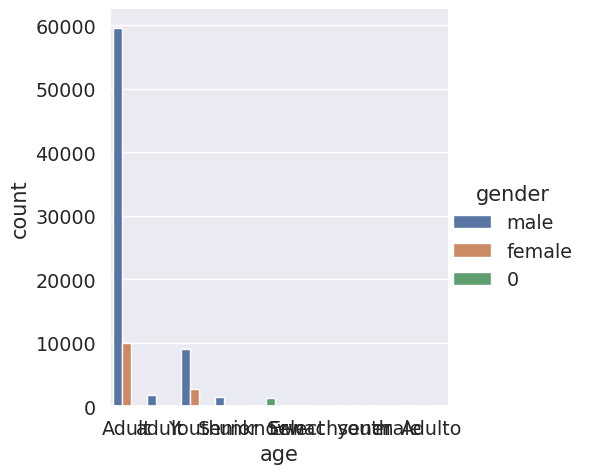

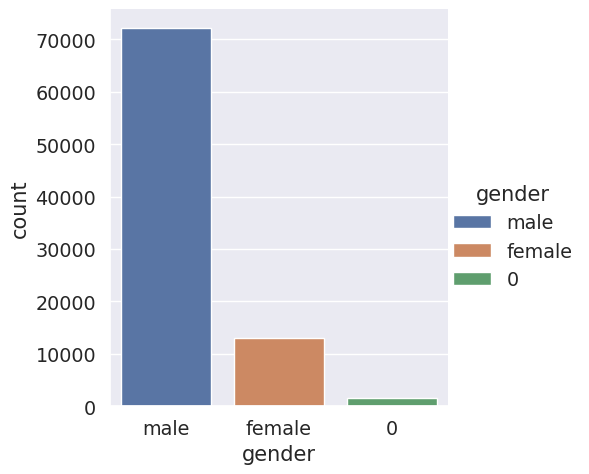

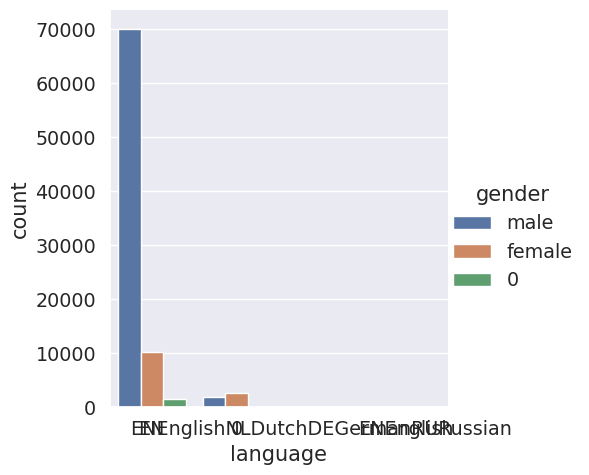

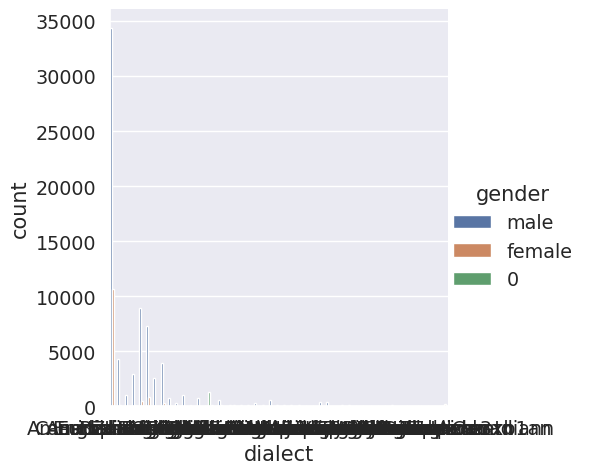

In [43]:
for feature in cat.columns:
  sns.catplot(x=feature,hue='gender',data=df,kind="count")
  print("------------------------------------------------------------")
  #sns.boxplot(x=feature,hue='gender',data=df)
  #print("============================================================")

<Axes: xlabel='age'>

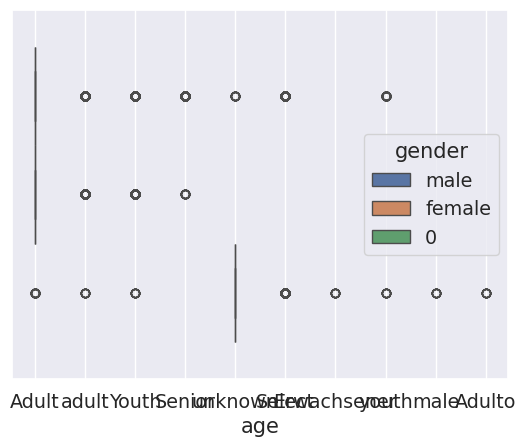

In [44]:
sns.boxplot(x="age",hue='gender',data=df)

<Axes: xlabel='dialect'>

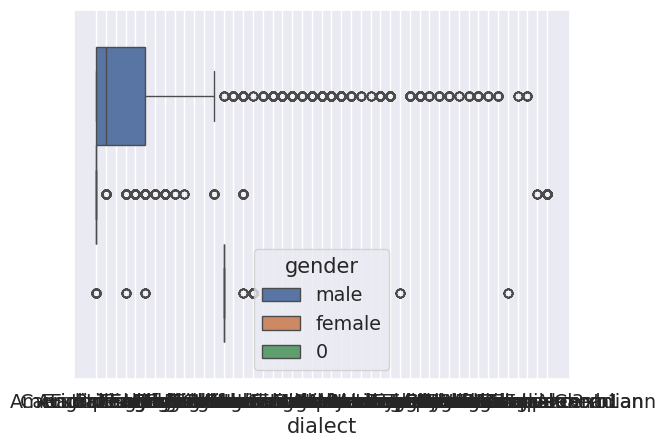

In [45]:
sns.boxplot(x="dialect",hue='gender',data=df)

In [46]:
for feature in cat.columns:
  #a = df[feature].unique()
  counts = df[feature].value_counts()
  strTmp = str(feature) + "_Label"
  df[strTmp] = df[feature].map(counts)
  df.drop(feature, axis=1, inplace=True)


In [47]:
df = df.dropna(axis=1, how='all')

In [48]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
#df = df.drop(columns=constant_columns, inplace=True)

In [49]:
df.drop(constant_columns, axis=1, inplace=True)

In [50]:
df = df.T.drop_duplicates().T

In [51]:
df.columns

Index(['channels', 'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75',
       'freq.IQR', 'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew',
       'kurt', 'sp.ent', 'time.ent', 'entropy', 'sfm', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx',
       'startdom', 'enddom', 'meanpeakf', 'GenderEncoded', 'age_Label',
       'gender_Label', 'language_Label', 'dialect_Label'],
      dtype='object')

In [52]:
df['GenderEncoded'].value_counts()


,count
GenderEncoded,
0.0,73715
1.0,12932


In [53]:
dfMaleCnt = df[df['GenderEncoded'] == 0]
print(len(dfMaleCnt))

73715


In [54]:
dfFemaleCnt = df[df['GenderEncoded'] == 1]
print(len(dfFemaleCnt))

12932


In [55]:
df = df.drop(np.random.choice(df.index[df['GenderEncoded'].eq(0)], len(dfMaleCnt) - len(dfFemaleCnt)))

In [56]:
df['GenderEncoded'].value_counts()

,count
GenderEncoded,
0.0,32298
1.0,12932


In [57]:
df.shape

(45230, 33)

In [58]:
dfBackup = df.copy()
dfBackup.shape

(45230, 33)

In [59]:
df.columns

Index(['channels', 'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75',
       'freq.IQR', 'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew',
       'kurt', 'sp.ent', 'time.ent', 'entropy', 'sfm', 'meanfun', 'minfun',
       'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx',
       'startdom', 'enddom', 'meanpeakf', 'GenderEncoded', 'age_Label',
       'gender_Label', 'language_Label', 'dialect_Label'],
      dtype='object')

In [60]:
df = df.drop('gender_Label', axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X = df.drop(['GenderEncoded'], axis = 1)
y = df['GenderEncoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36184, 31) (9046, 31) (36184,) (9046,)


In [62]:
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
#print(X_normalized)

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 13)
model.fit(X_normalized, y_train)
predicted = model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.30753924386469156


In [65]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.barplot(X_normalized.columns[:4], model.feature_importances_)
# plt.xticks(rotation = 50)
# plt.show()


<Axes: >

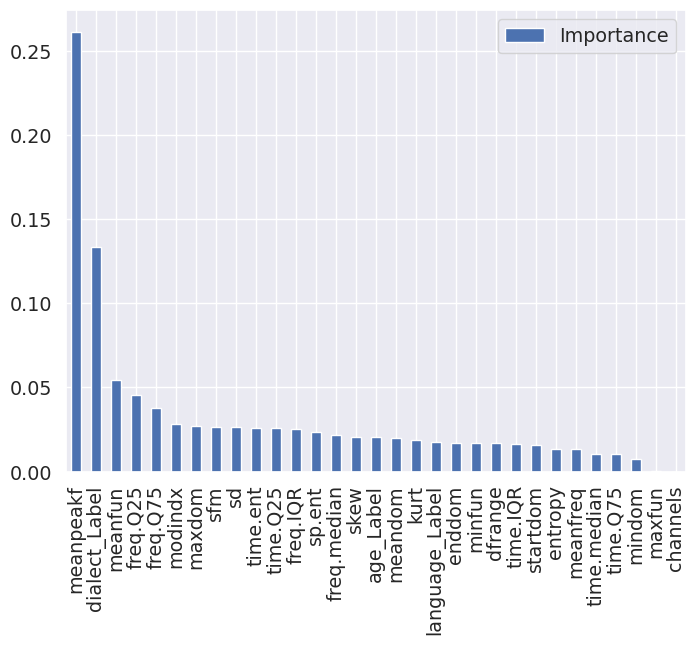

In [66]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_normalized.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [67]:
data = list(zip(df.columns, model.feature_importances_))
Featuredf = pd.DataFrame(data, columns =['Feature', 'Importance'])
Featuredf

,Feature,Importance
0,channels,0.000000
1,meanfreq,0.013257
2,sd,0.026289
3,freq.median,0.021690
4,freq.Q25,0.045759
5,freq.Q75,0.037660
6,freq.IQR,0.025402
7,time.median,0.010528
8,time.Q25,0.025790
9,time.Q75,0.010438


Accuracy: 0.7113641388458988


,Feature,Importance
0,channels,0.000200
1,meanfreq,0.022879
2,sd,0.029035
3,freq.median,0.027651
4,freq.Q25,0.048580
5,freq.Q75,0.027591
6,freq.IQR,0.028347
7,time.median,0.018640
8,time.Q25,0.025449
9,time.Q75,0.018176


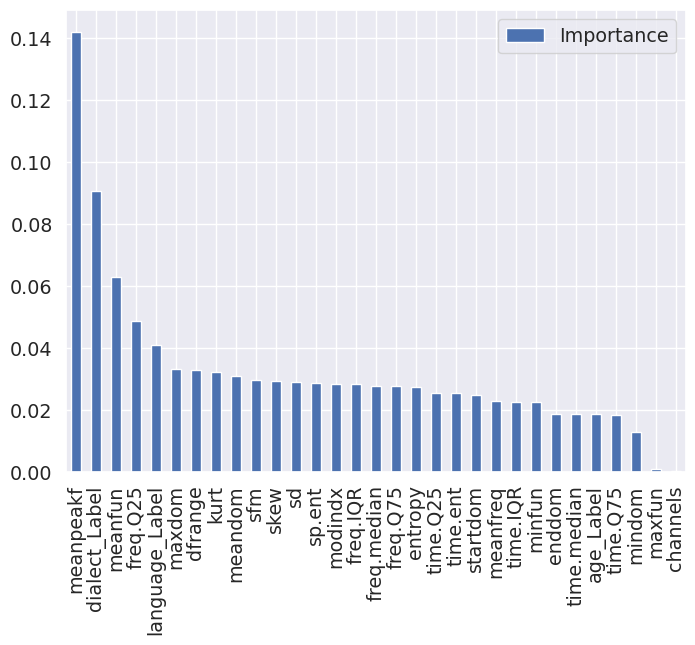

In [68]:
model = RandomForestClassifier(random_state = 13)
model.fit(X_normalized, y_train)
predicted = model.predict(X_test)

accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')


feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))


data = list(zip(df.columns, model.feature_importances_))
Featuredf = pd.DataFrame(data, columns =['Feature', 'Importance'])
Featuredf

Accuracy: 0.45688702188812735


,Feature,Importance
0,channels,0.015559
1,meanfreq,0.017104
2,sd,0.027148
3,freq.median,0.017077
4,freq.Q25,0.026817
5,freq.Q75,0.040042
6,freq.IQR,0.024917
7,time.median,0.011632
8,time.Q25,0.018712
9,time.Q75,0.015451


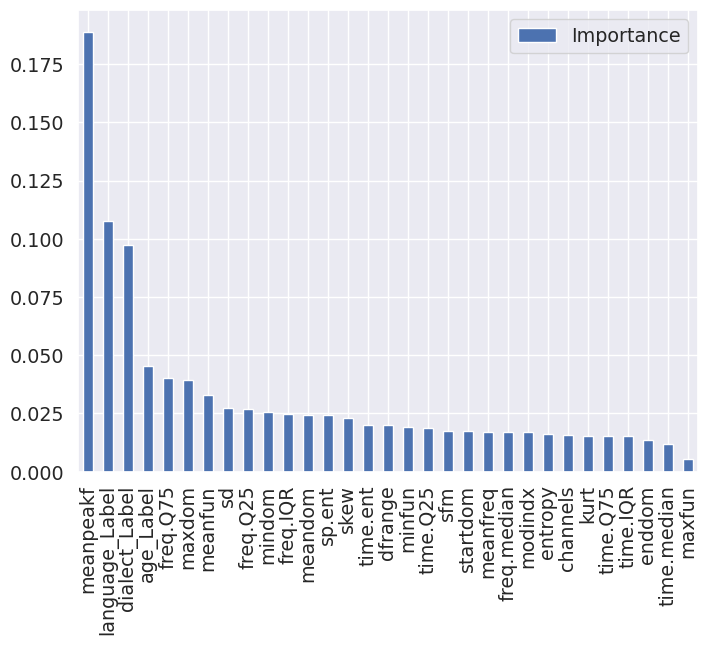

In [69]:
model = xgb.XGBClassifier(random_state = 13)
model.fit(X_normalized, y_train)
predicted = model.predict(X_test)

accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')


feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))


data = list(zip(df.columns, model.feature_importances_))
Featuredf = pd.DataFrame(data, columns =['Feature', 'Importance'])
Featuredf

In [70]:
import sklearn.neural_network
# Create an instance of the MLPClassifier class
 #neural_network = sklearn.neural_network.MLPClassifier
model = sklearn.neural_network.MLPClassifier(random_state = 13)
model.fit(X_normalized, y_train)
predicted = model.predict(X_test)

accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')


# feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
# feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# feat_importances.plot(kind='bar', figsize=(8,6))


# data = list(zip(df.columns, model.feature_importances_))
# Featuredf = pd.DataFrame(data, columns =['Feature', 'Importance'])
# Featuredf

Accuracy: 0.6812956002653107


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
import sklearn.svm
# Create an instance of the SVC class
#svm = sklearn.svm.SVC
model = sklearn.svm.SVC(random_state = 13)
model.fit(X_normalized, y_train)
predicted = model.predict(X_test)

accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')


# feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
# feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# feat_importances.plot(kind='bar', figsize=(8,6))


# data = list(zip(df.columns, model.feature_importances_))
# Featuredf = pd.DataFrame(data, columns =['Feature', 'Importance'])
# Featuredf

Accuracy: 0.715233252266195


In [72]:
import sklearn.svm
# Create an instance of the SVC class
#svm = sklearn.svm.SVC
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_normalized, y_train)
predicted = model.predict(X_test)

accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')


# feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
# feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# feat_importances.plot(kind='bar', figsize=(8,6))


# data = list(zip(df.columns, model.feature_importances_))
# Featuredf = pd.DataFrame(data, columns =['Feature', 'Importance'])
# Featuredf

Accuracy: 0.24784435109440636


Accuracy: 0.6818483307539244


,Feature,Importance
0,channels,0.000000
1,meanfreq,0.001221
2,sd,0.012847
3,freq.median,0.001198
4,freq.Q25,0.036841
5,freq.Q75,0.008572
6,freq.IQR,0.011950
7,time.median,0.000147
8,time.Q25,0.001222
9,time.Q75,0.000000


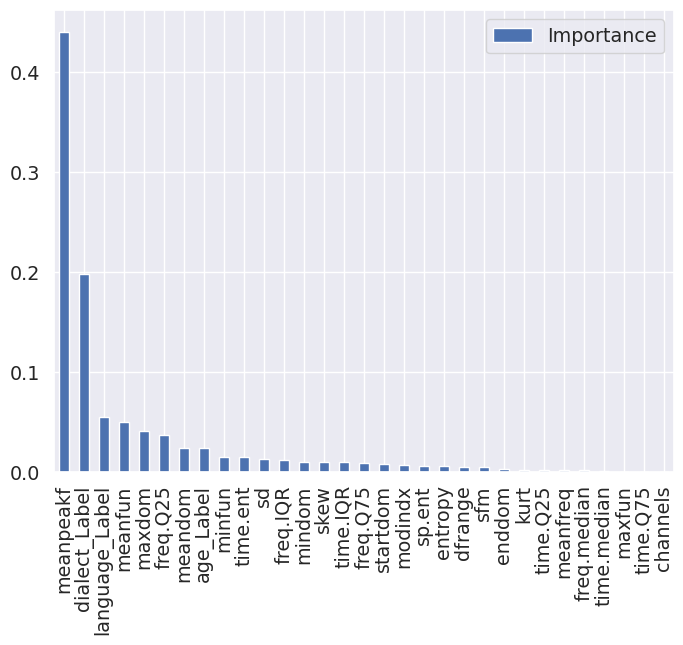

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_normalized, y_train)
predicted = model.predict(X_test)

accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')


feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))


data = list(zip(df.columns, model.feature_importances_))
Featuredf = pd.DataFrame(data, columns =['Feature', 'Importance'])
Featuredf

In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [75]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_normalized, y_train), ( X_test, y_test)]
    clf.fit(X_train, y_train,eval_set=evaluation,verbose=False)

    # clf.fit(X_train, y_train,
    #         eval_set=evaluation, eval_metric="auc",
    #         early_stopping_rounds=10,verbose=False)
        # clf.fit(X_train, y_train,
        #     eval_set=evaluation,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [76]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.8590537254034932
SCORE:
0.8579482644262657
SCORE:
0.8579482644262657
SCORE:
0.861375193455671
SCORE:
0.8639177537032943
SCORE:
0.8558478885695335
SCORE:
0.8455671014813178
SCORE:
0.8535264205173557
SCORE:
0.8504311297811187
SCORE:
0.8492151227061685
SCORE:
0.8602697324784435
SCORE:
0.8561795268627017
SCORE:
0.850762768074287
SCORE:
0.862259562237453
SCORE:
0.863143931019235
SCORE:
0.8535264205173557
SCORE:
0.8513154985629007
SCORE:
0.8536369666150785
SCORE:
0.8590537254034932
SCORE:
0.8611541012602255
SCORE:
0.8602697324784435
SCORE:
0.862259562237453
SCORE:
0.8614857395533938
SCORE:
0.864028299801017
SCORE:
0.8602697324784435
SCORE:
0.8589431793057705
SCORE:
0.8549635197877515
SCORE:
0.8590537254034932
SCORE:
0.8581693566217112
SCORE:
0.862259562237453
SCORE:
0.862701746628344
SCORE:
0.860490824673889
SCORE:
0.8559584346672563
SCORE:
0.850320583683396
SCORE:
0.8527525978332965
SCORE:
0.858279902719434
SCORE:
0.8564006190581472
SCORE:
0.852531505637851
SCORE:
0.857837718328543

In [77]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7156428314397619, 'gamma': 1.0172709000041116, 'max_depth': 6.0, 'min_child_weight': 8.0, 'reg_alpha': 41.0, 'reg_lambda': 0.39369148057985487}
